<a href="https://colab.research.google.com/github/DDR7707/End-To-End-DNN-Projects/blob/main/Credit%20Card%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card ANN Prediction

## Importing required primary libraries

In [4]:
import numpy as np                   # For creating matrices and for number operations
import pandas as pd                  # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns                # To plot heatmaps
sns.set_style("darkgrid")
import warnings                      # Hide warnings
warnings.filterwarnings('ignore')

## Data Viewing

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Data Files/Job A Thon/train.csv")
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


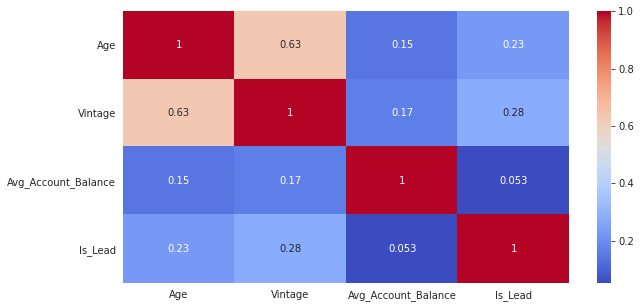

In [7]:
plt.figure(figsize = (10 , 5))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm") 

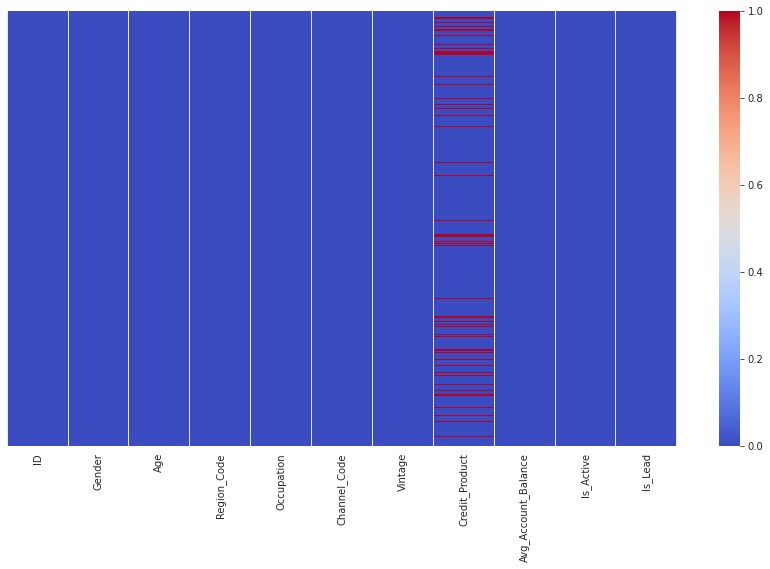

In [8]:
plt.figure(figsize = (15 , 8))                                      # Heatmap for missing values in dataframe
sns.heatmap(df.isnull() , cmap = "coolwarm" , yticklabels = False)

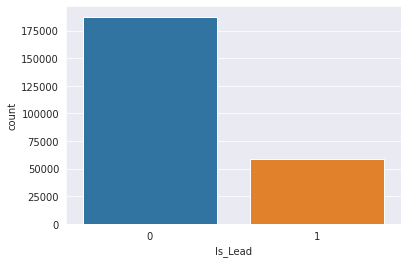

In [9]:
# Getting value counts of target column
sns.countplot(data = df , x = "Is_Lead");

In [10]:
df.isna().sum()    # Checking for number of missing values

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

## EDA Tools

In [11]:
# Getting detailed analysis on unique , value_counts

for i in df.columns:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in ID column is/are 245725


The unique values in ID column is/are ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']


The value counts for each value in ID column is/are :  
BGESLSJY    1
JNU9GMRH    1
GXYRLJRZ    1
YWZTK2F6    1
ZNPFZUVY    1
           ..
EDZO5EPL    1
MMHCNEC4    1
UOCMMVAF    1
SPIVSHSU    1
UUKW7ZQJ    1
Name: ID, Length: 245725, dtype: int64



****************************************************************************************************



The number of unique values in Gender column is/are 2


The unique values in Gender column is/are ['Female' 'Male']


The value counts for each value in Gender column is/are :  
Male      134197
Female    111528
Name: Gender, dtype: int64



****************************************************************************************************



The number of unique values in Age column is/are 63


The unique values in Age column is/are [73 30 56 34 62 48 40 55 53 27 31 79

In [12]:
df.drop(["ID"] , axis = 1 , inplace = True)
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [13]:
df["Credit_Product"].fillna("Unknown" , inplace = True)

In [14]:
df["Credit_Product"].value_counts()

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

In [15]:
tt = pd.read_csv("/content/drive/MyDrive/Data Files/Job A Thon/test.csv")
tt.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [16]:
ids = tt["ID"]
tt.drop(["ID"] , axis = 1 , inplace = True)
tt.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [17]:
tt["Credit_Product"].fillna("Unknown" , inplace = True)

## Data Visualization

### Pairplot

<Figure size 720x720 with 0 Axes>

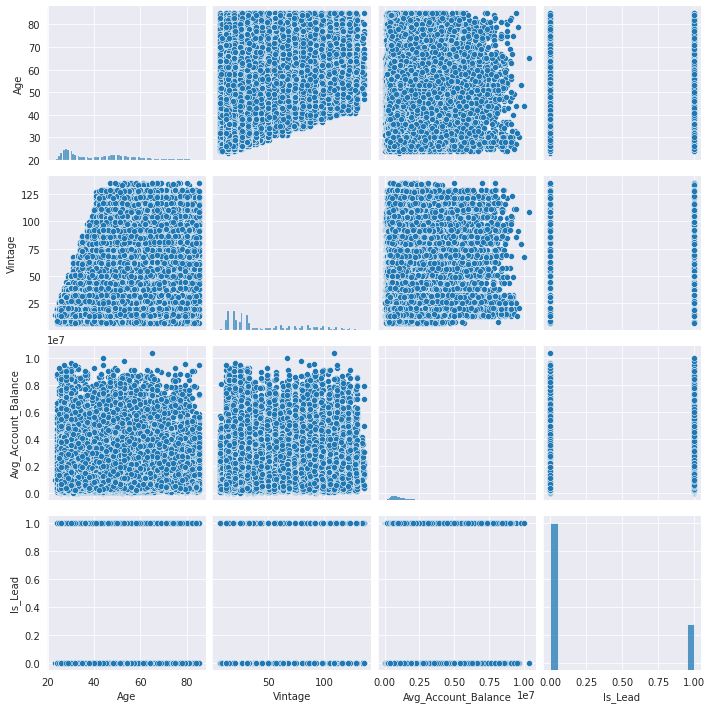

In [18]:
plt.figure(figsize = (10 , 10))
sns.pairplot(data = df)

### Histplots

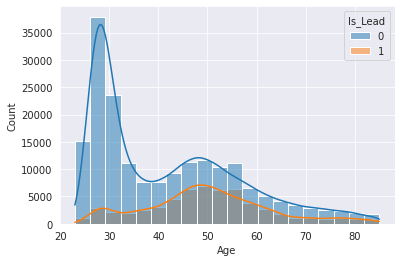

In [19]:
sns.histplot(data = df , x = "Age" , kde = True , hue = "Is_Lead" , bins = 20)

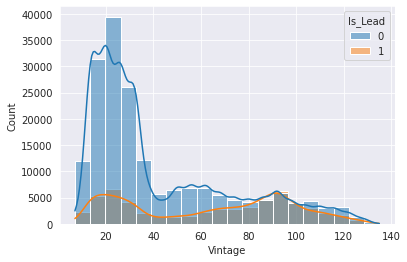

In [20]:
sns.histplot(data = df , x = "Vintage" , kde = True , hue = "Is_Lead" , bins = 20)

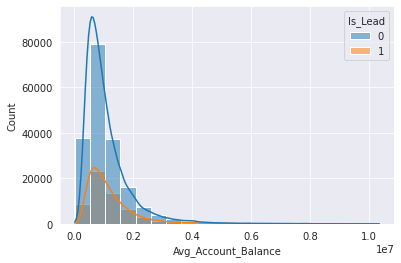

In [21]:
sns.histplot(data = df , x = "Avg_Account_Balance" , kde = True , hue = "Is_Lead" , bins = 20)

### Countplots

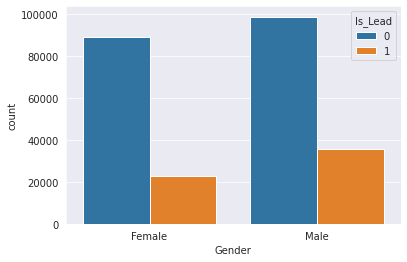

In [22]:
sns.countplot(data = df , x = "Gender" , hue = "Is_Lead")

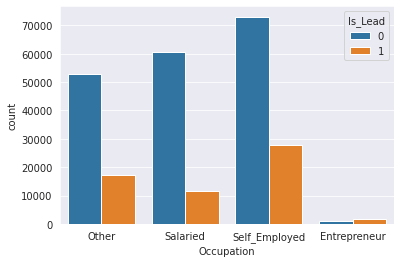

In [23]:
sns.countplot(data = df , x = "Occupation" , hue = "Is_Lead")

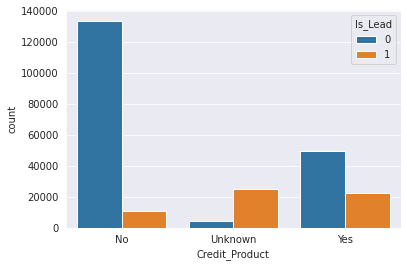

In [24]:
sns.countplot(data = df , x = "Credit_Product" , hue = "Is_Lead")

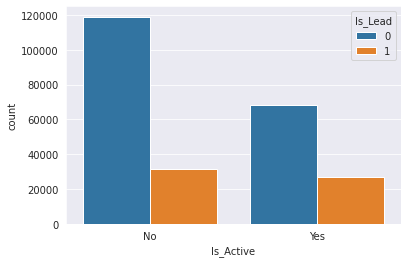

In [25]:
sns.countplot(data = df , x = "Is_Active" , hue = "Is_Lead")

## Data Preprocessing

In [26]:
for i in ["Age" , "Vintage" , "Avg_Account_Balance"]:
    df[i] = np.log(df[i] + 1)
    tt[i] = np.log(tt[i] + 1)

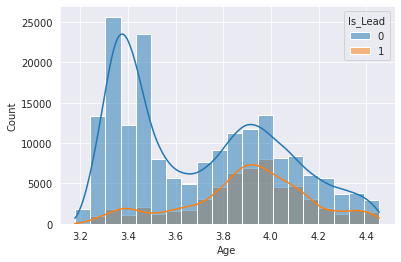

In [27]:
sns.histplot(data = df , x = "Age" , kde = True , hue = "Is_Lead" , bins = 20)

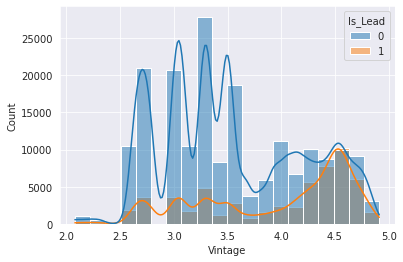

In [28]:
sns.histplot(data = df , x = "Vintage" , kde = True , hue = "Is_Lead" , bins = 20)

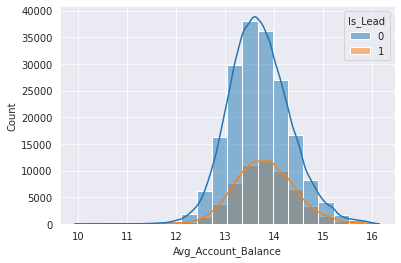

In [30]:
sns.histplot(data = df , x = "Avg_Account_Balance" , kde = True , hue = "Is_Lead" , bins = 20)

In [31]:
# Getting Dummies columns , dropping first column in dummies to get rid of multicollinearity

df = pd.get_dummies(df , columns = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , prefix = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , drop_first = True)
tt = pd.get_dummies(tt , columns = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , prefix = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , drop_first = True)

In [32]:
df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,4.304065,3.784190,13.860194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,3.433987,3.496508,13.274207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,4.043051,3.295837,14.210465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,3.555348,2.995732,13.061456,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3.433987,3.526361,13.695361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


Other way of encoding categorical columns

In [33]:
tt.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,3.401197,3.258097,13.517599,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,3.784190,3.912023,13.738130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,3.465736,2.708050,12.282802,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3.401197,3.526361,13.674029,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3.401197,2.995732,13.395573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [10]:
# from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()

# lbs = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"]


# for i in lbs:
#   df[i] = lb.fit_transform(df[i])
#   tt[i] = lb.transform(tt[i])

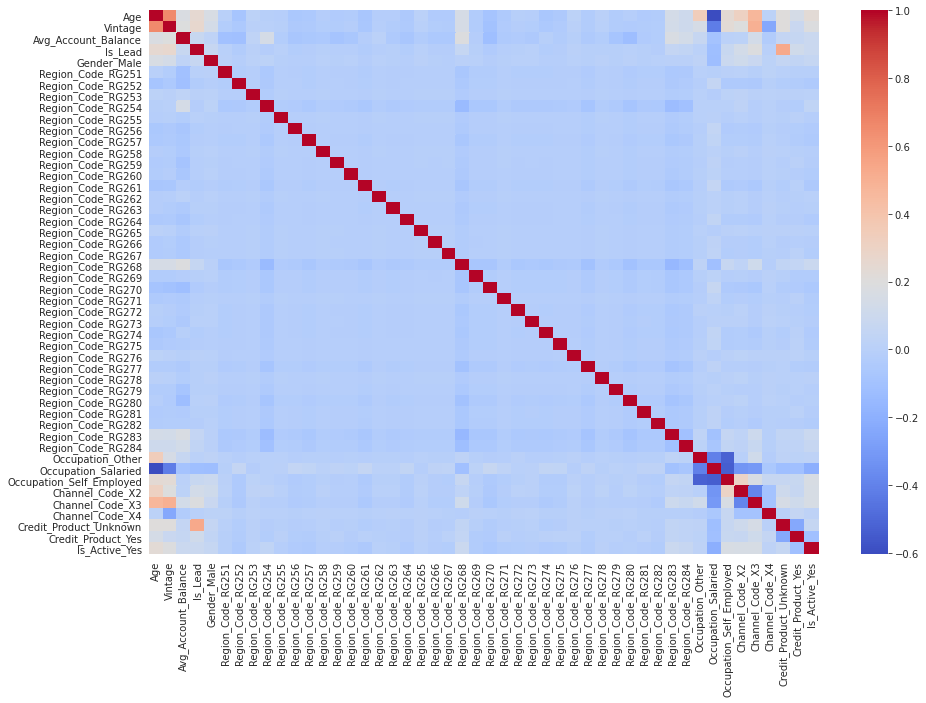

In [34]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df.corr() , cmap = "coolwarm")

## Train Test Splitting

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(["Is_Lead"] , axis = 1)
y = df["Is_Lead"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(196580, 49145, 196580, 49145)

## Data Preprocessing

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[["Age" , "Vintage" , "Avg_Account_Balance"]] = scaler.fit_transform(X_train[["Age" , "Vintage" , "Avg_Account_Balance"]])
X_test[["Age" , "Vintage" , "Avg_Account_Balance"]] = scaler.transform(X_test[["Age" , "Vintage" , "Avg_Account_Balance"]])
tt[["Age" , "Vintage" , "Avg_Account_Balance"]] = scaler.transform(tt[["Age" , "Vintage" , "Avg_Account_Balance"]])

## Upsampling with SMOTE

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [37]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

0    149917
1     46663
Name: Is_Lead, dtype: int64

In [38]:
sm = SMOTE(random_state = 42)
X_train_1, y_train_1 = sm.fit_resample(X_train , y_train.ravel())
sum(y_train_1 == 1) , sum(y_train_1 == 0)

(149917, 149917)

In [39]:
from keras import backend as K

# Defining own metrics
def auc(y_true, y_pred):
    auc = tf.keras.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [53]:
import tensorflow as tf
tf.random.set_seed(42)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
# ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
# ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ["accuracy"])

In [54]:
%%time

h = ann.fit(X_train_1 , y_train_1 , validation_split=0.1 , batch_size = 32 , epochs = 25)

Epoch 1/25
8433/8433 [==============================] - 20s 2ms/step - loss: 0.4602 - accuracy: 0.7903 - val_loss: 0.5271 - val_accuracy: 0.7493
Epoch 2/25
8433/8433 [==============================] - 20s 2ms/step - loss: 0.4414 - accuracy: 0.8039 - val_loss: 0.5230 - val_accuracy: 0.7555
Epoch 3/25
8433/8433 [==============================] - 20s 2ms/step - loss: 0.4390 - accuracy: 0.8055 - val_loss: 0.5207 - val_accuracy: 0.7420
Epoch 4/25
8433/8433 [==============================] - 20s 2ms/step - loss: 0.4377 - accuracy: 0.8060 - val_loss: 0.4909 - val_accuracy: 0.7532
Epoch 5/25
8433/8433 [==============================] - 19s 2ms/step - loss: 0.4367 - accuracy: 0.8073 - val_loss: 0.4985 - val_accuracy: 0.7479
Epoch 6/25
8433/8433 [==============================] - 20s 2ms/step - loss: 0.4356 - accuracy: 0.8085 - val_loss: 0.5127 - val_accuracy: 0.7478
Epoch 7/25
8433/8433 [==============================] - 20s 2ms/step - loss: 0.4350 - accuracy: 0.8085 - val_loss: 0.5238 - val_ac

## Model Evaluation and fitting

Text(0, 0.5, 'Epochs')

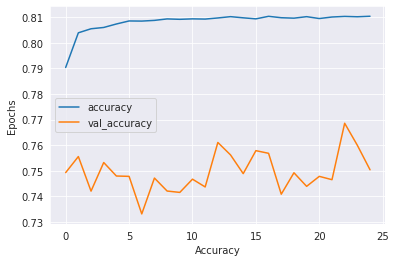

In [55]:
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.legend(["accuracy" , "val_accuracy"])
plt.xlabel("Accuracy")
plt.ylabel("Epochs")

Text(0, 0.5, 'Epochs')

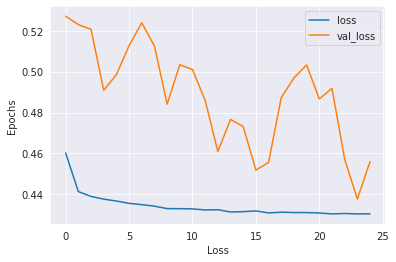

In [56]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.legend(["loss" , "val_loss"])
plt.xlabel("Loss")
plt.ylabel("Epochs")

In [57]:
X_test = X_test[X_test.columns].values
X_test

array([[ 2.05331793,  0.45415702, -1.18386556, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67461805,  0.73383838, -0.53337724, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87623099, -0.55610574,  1.36672054, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.49551745,  1.28572677, -0.23942954, ...,  0.        ,
         0.        ,  1.        ],
       [-1.39844806, -0.79958725,  0.26957769, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.89825779,  0.45415702, -1.24700778, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
y_test = y_test.ravel()
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_preds = ann.predict(X_test)

In [60]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int).ravel()
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix , roc_auc_score , f1_score , accuracy_score , classification_report , roc_curve , auc , plot_roc_curve
from sklearn.model_selection import cross_val_score

In [62]:
final = pd.DataFrame({"True" : y_test , "Preds" : y_pred})
final

,True,Preds
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
49140,0,0
49141,0,1
49142,0,0
49143,0,0


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32630  4890]
 [ 3212  8413]]


0.8351409095533625

In [64]:
y_pred = ann.predict(tt)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int).ravel()
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [65]:
data_ann = {"ID" : ids , 
       "Is_Lead" : y_pred.ravel()}

final_ann = pd.DataFrame(data_ann, columns = ["ID" , "Is_Lead"])
final_ann.head(5)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [66]:
final_ann["Is_Lead"].value_counts()

0    76709
1    28603
Name: Is_Lead, dtype: int64

In [67]:
final_ann.to_csv("Credit Card , ss , upsampling , label , ann.csv" , index = False)

## Evaluation function

In [69]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    X_test = X_test[X_test.columns].values
    y_test = y_test.ravel()
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    roc = roc_auc_score(y_test , model[1].predict_proba(X_test)[: , 1])
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    ac = auc(fpr, tpr)
    f1 = f1_score(y_test , preds)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"ROC AUC Score: {roc:.4f}")
    print('\n')
    
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    print(f"AUC : {ac:.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")

    plt.figure(figsize = (8, 5))
    plot_roc_curve(model[1], X_test, y_test , color = '#FF4500')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
    plt.show()
    print("\n")
    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(roc)
    sam.append(f1)
    sam.append(ac)
    
    return sam , mod

# The model is overfitting and will be updated